# matplotlib 入門

## matplotlibとは？

matplotlibはPythonとNumPyのための標準的なグラフ描画ライブラリです。主として2次元のグラフを描画するのに使われていますが、一部3次元グラフにも対応しています。
matplotlibで描いたグラフは、ベクトル形式を含む様々なフォーマットで出力することができ、wxPython、Qt、GTKといったPythonのGUIツールキットにおいてグラフを描画するのにも使えます。  
大学などで使われている商用ソフトMATLABと類似のAPIも備わっています。

## インストールと初期設定

matplotlibは通常のPythonライブラリと同様にpipを使ってインストールします。

`matplotlib`をインポートする際には、`mpl`と略すのが慣例となっています。なお、簡単なグラフ作成の場合には`matplotlib`本体をインポートする必要はありませんが、詳細な設定を行う際には必要です。

In [1]:
import matplotlib as mpl

グラフなどの描画には`matplotlib.pyplot`モジュールを使用します。こちらも`plt`と略すのが慣例となっています。

In [2]:
import matplotlib.pyplot as plt

matplotlibは様々な描画モジュールを持っていますが、Jupyterノートブックに画像を表示するには、下記のマジックコマンドを使用します。

In [3]:
%matplotlib inline

### 日本語のフォントと設定  

matplotlibの既定のフォントは“DejaVu Sans”で日本語には対応していません。  
また、matplotlibで使えるフォントの形式はTTF形式あるいはOTF形式に限られています。  
一方、Windows 10 では日本語フォントはTTC形式がほとんどであり、TTF形式のフォントは「游明朝」“Yu Mincho”くらいしかありません。   
このため、TTFあるいはOTF形式のオープンソースフォントを使うことが多いようです。無料で使用できるフォントの例としてはIPAのフォントやGoogleのフォントがあります。

#### おすすめのフォント

- IPAフォント: https://ipafont.ipa.go.jp/node26#ja ‒ IPAexGothic, IPAexMincho
- Google Notoフォント: https://www.google.com/get/noto/ ‒ Noto Sans CJK JP, Noto Serif CJK JP  

#### フォントのインストール

フォントのインストール方法はOSによって異なります。

##### Windows

1. ダウンロードしたファイルを解凍します。
1. コントロールパネルのフォントを開きます。（クラシック表示にする）
1. 1でとりだした.ttfあるいは.otfファイルをドラッグアンドドロップします。

##### Mac OS

1. ダウンロードしたファイルを解凍します。
1. Font Bookアプリケーションを起動します。
1. 1でとりだした.ttfあるいは.otfファイルをドラッグアンドドロップします。

あるいは解凍してできた.ttfファイルまたは.otfファイルをダブルクリックして表示されるダイアログで「フォントをインストール」をクリックします。

##### Linux

1. ホームディレクトリに`.fonts`ディレクトリを作成します。
1. ダウンロードしたファイルを１で作成したディレクトリ(`~/.fonts`)に解凍します。
1. `fc-cache -fv`コマンドを実行してフォントキャッシュを更新します。

##### フォントキャッシュの削除

matplotlibが使用するフォントファイルのリストはキャッシュされるため、フォントのインストールなどを行なった場合には、キャッシュファイルの削除を行う必要があります。  
フォントキャッシュはユーザーのホームディレクトリの`.matplotlib`ディレクトリに作成されます。  
下記のような名前のファイルがキャッシュファイルです。これらを削除してから、`matplotlib`をインポートし直します。

* fontList.json
* fontList.py3k.cache

#### フォントの指定

##### 設定ファイルによる指定

matplotlibの設定ファイルにあるフォントセクションをカスタマイズする方法です。  
matplotlibの設定ファイルは、Python3.6の場合、`<venvディレクトリ>/lib⁩/python3.6⁩/⁨site-packages⁩/⁨matplotlib⁩/⁨mpl-data/matplotlibrc⁩`に存在しますが、ホームディレクトリの`.matplotlib`ディレクトリに`matplotlibrc`があればこちらが優先されます。このため、ここにコピーしてから編集すると良いでしょう。  

現在読み込まれている`matplotlibrc`の場所は下記のコードで確認できます。

In [4]:
mpl.matplotlib_fname()

'/Users/masatoshi/.matplotlib/matplotlibrc'

##### プログラム先頭での指定

プログラムの先頭でmatplotlibrcの設定を上書きする方法です。

In [5]:
import matplotlib as mpl
font = {"family":"IPAPGothic", "size": 12.0 }
mpl.rc('font', **font) # mpl.rc('font', family='IPAPGothic', size=12.0)

##### 描画の都度指定

描画を行う都度設定を行う方法です。この他にテキスト出力を行う際に指定する方法もあります。

ここでは、OSの種類によって既存のフォントを設定する例を示します。（ただし、AppleGothicはマイナス記号、ハイフンなどが文字化けします）

In [6]:
import platform

pf = platform.system()

if pf == 'Windows':
    plt.rcParams['font.family'] = 'Yu Mincho'
elif pf == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:    
    plt.rcParams['font.family'] = 'IPAexGothic'

## 簡単なグラフを書く

### 簡単な折れ線グラフ

まずはよく使用する折れ線グラフを簡単に描いてみましょう。

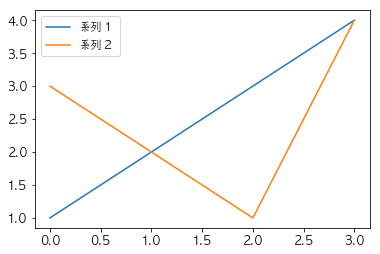

In [7]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.plot([3, 2, 1, 4])

# 凡例の追加
plt.legend(['系列１','系列２'])

# グラフの保存（保存形式は拡張子で判断されます）
plt.savefig('chart1.png')

上記のようにデータが１系列の場合、横軸（x軸）にはデータのインデックス（0から始まる）が使用されます。

## 2つのAPI

matplotlibには2つのAPIが設けられています。  
簡易な描画を行うためのステートフルAPIと、オブジェクトの階層構造によるオブジェクト指向APIです。

### ステートフルAPI

上記の例のように、pyplotモジュールの関数を連続して呼び出すことで描画を行う手法です。行った操作は状態として残ることになります。

### オブジェクト指向API

matplotlibはArtistとよばれるのオブジェクトの階層構造で構築されており、そのグラフはFigureインスタンスと、その中にある一つ以上のAxesインスタンスで構成されています。  
Figureインスタンスは描画要素の入れ物（キャンバス）で、Axesは一つのグラフを描く領域（座標系）です。

Figureインスタンスは、左下を(0,0)、右上を(1,1)とする座標系を持っており、Axesインスタンスの位置を指定する際などに使用されることがあります。

一つの図に複数のグラフを描画したい場合、Figureインスタンスに複数のAxesインスタンスを配置することになります。

## 様々なグラフ

matplotlibでは2次元及び3次元のグラフを描画することができます。2次元の描画メソッドには次のようなものがあります。

|メソッド|說明|
|:---|:---|
|plot|折れ線グラフ|
|scatter|散布図|
|step|階段状グラフ|
|bar|縦棒グラフ|
|barh|横棒グラフ|
|errorbar|エラーバーグラフ|
|hist|ヒストグラム|
|fill|面グラフ|
|quiver|ベクトルグラフ|
|pie|円グラフ|
|stem|離散データグラフ|
|boxplot|箱ひげ図|
|stackplot|積み上げ面グラフ|

ここでは、機械学習などの際によく使用されるグラフを中心にいくつかを紹介します。

### 折れ線グラフ

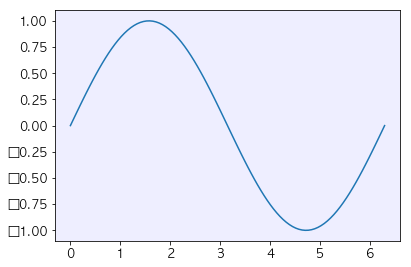

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# キャンバスの初期化
fig = plt.figure()
# グラフ領域の追加（キャンバス内の位置とサイズ、色を指定した例）
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8), facecolor='#eeeeff')

# グラフの描画
ax.plot(x, y)
plt.show()

上記の例のように、キャンバス（Figure）の初期化と、グラフ描画領域（axes）の追加を順を追って行うこともできますが、これらを同時に行い、1つのキャンバスに複数グラフを描画するのにも使える`pyplot.subplots()`メソッドを使うことが多いです。

### 散布図

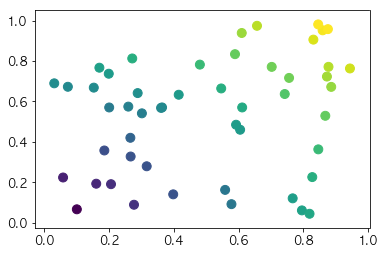

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
z = np.sqrt(x**2 + y**2)

fig, ax = plt.subplots()

ax.scatter(x, y, s=80, c=z)

Jupyter上でインライン表示を行っている場合、上記のように`pyplot.show()`を明示的に呼び出さなくともグラフは表示されます。ただ、戻り値が表示されてしまうので、これを見せたくない場合には`pyplot.show()`を明示的に呼び出すと良いでしょう。

線グラフを作成する`axes.plot()`メソッドでも、後述するマーカーのみを表示することで、簡易的に散布図は作成できます。`axes.scatter()`では上記の例のように、もう一つの次元を色で表すことができたりします。

### 棒グラフ

<BarContainer object of 4 artists>

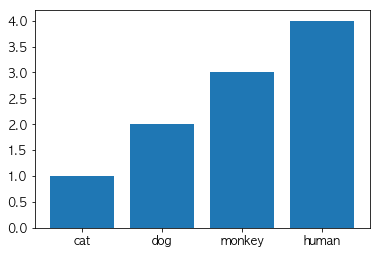

In [10]:
fig, ax = plt.subplots()

ax.bar(['cat', 'dog', 'monkey', 'human'], [1, 2, 3, 4])

x軸の描画位置を調整しながら複数回`axes.bar()`を複数回呼ぶことで、複数の数値を並べた棒で表すグラフを作ったり、`bottom`パラメータで棒の始点をずらすことで、積み上げ棒グラフを描画することができます。

横棒グラフは`axes.barh()`メソッドを使うことで同様に作成可能です。

###  ヒストグラム

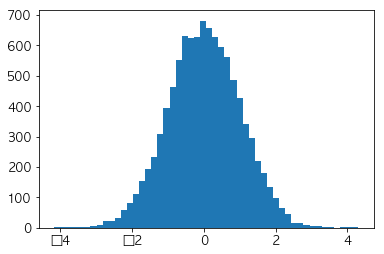

In [11]:
x = np.random.normal(0, 1, 10000)

fig, ax = plt.subplots()

ax.hist(x, bins=50)
plt.show()

上記の例では、`bins`パラメータでヒストグラムの区間の数を指定しています。この場合には最大値と最小値の間を等間隔で区分することになります。
この他、数列を与えることで区間の境界値を指定することもできます。また、`density=True`を指定することで、個数ではなく構成比を表示することも可能です。

## 複数のグラフ

1つのキャンバスに複数のグラフを並べて作成する場合には、`pyplot.subplot()`メソッドに行数、列数を指定します。  
戻り値のaxesオブジェクトは2次元の配列となります。

`sharex`, `sharey` パラメータをTrueに設定することで、x軸、y軸を共通にし、軸の目盛ラベルを表示させないようにすることもできます。

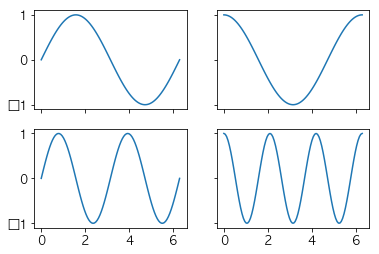

In [12]:
x = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0, 0].plot(x, np.sin(x))
ax[0, 1].plot(x, np.cos(x))
ax[1, 0].plot(x, np.sin(2*x))
ax[1, 1].plot(x, np.cos(3*x))

## 様々なグラフ要素

### タイトル・軸ラベル

`axes.set_title()`メソッドでグラフのタイトルを、`axes.set_xlabel()`, `axes.set_ylabel()`メソッドを呼ぶことでそれぞれx軸、y軸のラベルを指定できます。  
単純なテキスト以外に、LaTexで数式などを表記することも可能です。この場合、\をエスケープ文字として解釈しないよう、`r'...'`リテラルで「生の」文字列を指定することができます。  
また、一部のフォントだけを変更したい場合、`fontdict`パラメータで指定することが可能です。

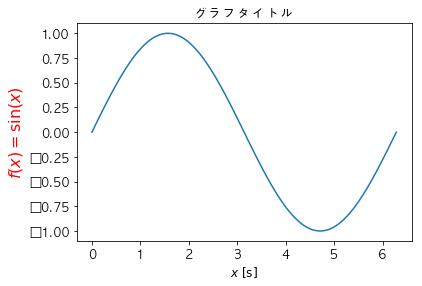

In [13]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, ax  = plt.subplots()

font = {'family': 'Arial',
        'color': 'red',
        'weight': 'bold',
        'size': 16,
        'style': 'italic',}

ax.plot(x, y)
ax.set_title('グラフタイトル')
ax.set_xlabel(r'$x\ [\mathrm{s}]$')
ax.set_ylabel(r'$f(x)=\sin(x)$', fontdict=font)
plt.show()

### 凡例

凡例を表示するには`axes.legend()`メソッドを呼び出します。  
下記の例のように、描画したオブジェクトにラベルを指定しておけば、`axes.legend()`メソッドで指定することなく表示できます。

パラメータでしていない限り、できるだけグラフと重ならない位置に凡例が表示されます。  
`loc='upper right'`のようにlocパラメータで位置を指定することもできます。

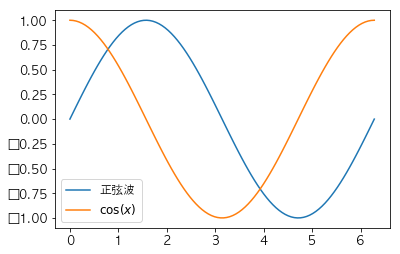

In [14]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1, label='正弦波')
ax.plot(x, y2, label=r'$\cos(x)$')
ax.legend()

###  線とマーカー

描画メソッドの呼び出しにパラメータを与えることで、線の色や種類、幅、マーカーの形や大きさ、色などを指定できます。

#### 線とマーカー関係のパラメータ

|引数|說明|
|:---|:---|
|color/c|線の色|
|alpha|透明度|
|linestye/ls|線種|
|linewidth/lw|線幅|
|marker|マーカーのスタイル|
|markersize/ms|マーカーの大きさ|
|markerfacecolor/mfc|マーカーの塗りつぶしの色|
|markeredgewidth/mew|マーカーの縁の幅|
|markeredgecolor/mec|マーカーの縁の色|

#### 色のオプション

|色|RGB|省略文字列|
|:---|:---|:---:|
|red|(1,0,0)|'r'|
|green|(0,1,0)|'g'|
|blue|(0,0,1)|'b'|
|yellow|(1,1,0)|'y'|
|magenta|(1,0,1)|'m'|
|cyan|(0,1,1)|'c'|
|black|(0,0,0)|'b'|
|white|(1,1,1)|'w'|

#### 線種のオプション

|線種|文字列|省略文字列|
|:---|:---|:---:|
|線なし|''|''|
|実線|'solid'|'-'|
|点線|'dotted'|':'|
|破線|'dashed'|'--'|
|1点鎖線|'dashdot'|'-.'|

### 線の例

Text(0.5, 1.0, '線幅')

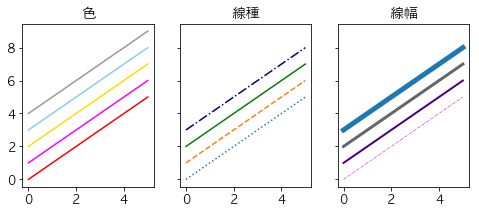

In [15]:
x = np.linspace(0,5, 10)

fig, ax = plt.subplots(1,3, figsize=(8, 3), sharey=True)

ax[0].plot(x, x, 'r')
ax[0].plot(x, x+1, c=(1,0,1))
ax[0].plot(x, x+2, '#FFDD00')
ax[0].plot(x, x+3, 'skyblue')
ax[0].plot(x, x+4, '0.6')
ax[0].set_title('色')

ax[1].plot(x, x, ':')
ax[1].plot(x, x+1, '--')
ax[1].plot(x, x+2, 'g-')
ax[1].plot(x, x+3, 'navy', ls='-.')
ax[1].set_title('線種')

ax[2].plot(x, x, 'm-.', lw=0.5)
ax[2].plot(x, x+1, c='indigo', lw=2.0)
ax[2].plot(x, x+2, '0.4', lw=3.0)
ax[2].plot(x, x+3, lw=5.0)
ax[2].set_title('線幅')

上記の例のように複数の指定をまとめて行うこともできます。

### マーカーの例

#### マーカーのスタイル

|値|マーカー|
|:---|:---|
|'.', ',', 'o'|点、ピクセル、円|
|'<', '>', '^', 'v'|三角形（左、右、上、下）|
|'1', '2', '3', '4'|三面角（下、上、左、右）|
|'s', 'p', '8', 'h', 'H'|四角形、五角形、八角形、六角形|
|'*', '+', 'x', 'D', 'd'|星、＋記号、x印、ひし形、薄いひし形|
|'&#124;', '_'|垂直線、水平線|
|0, 1, 2, 3|目盛線（左、右、上、下）|
|4, 5, 6, 7|挿入記号（左、右、上、下）|


(0, 7)

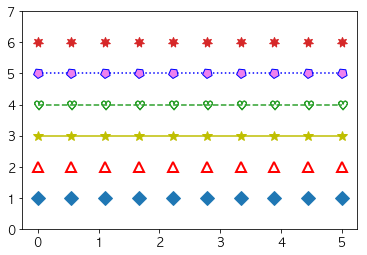

In [16]:
x = np.linspace(0, 5, 10)
y = np.ones_like(x)

star = mpl.path.Path.unit_regular_star(7)

fig, ax = plt.subplots()

ax.plot(x, y, 'D', ms=10)
ax.plot(x, y+1, '^', ms=10, mfc='w', mew=2.0, mec='r')
ax.plot(x, y+2, 'y*-', ms=10)
ax.plot(x, y+3, '--', marker='$\heartsuit$', ms=10)
ax.plot(x, y+4, 'b:', marker=(5, 0, 30), ms=10, mfc='violet')
ax.plot(x, y+5, ' ', ms=10, marker=star)
ax.set_ylim(0, 7)

上記のようにmatplotlibで予め定義されている図形や、LaTex記法も使用できます。

###  座標軸

#### 座標軸の上限下限の設定

座標軸の下限上限は`axes.set_xlim()`メソッド、`axes.set_ylim()`メソッドを使って指定できます。

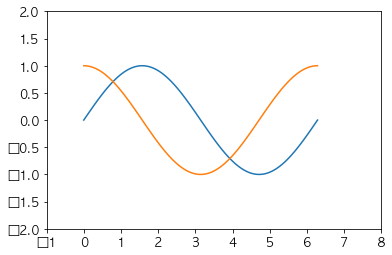

In [17]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlim(-1, 8)
ax.set_ylim(-2, 2)
plt.show()

#### 目盛りと目盛りラベルの設定

座標軸の目盛りは、`axes.set_xticks()`、`axes.set_yticks()`を使用して指定します。  
目盛りにラベルを指定する場合には、`axes.set_xticklabels()`、`axes.set_yticklabels()`メソッドを使用します。  

通常の目盛りの他に細かい目盛りを表示するには、`axes.xaxis.set_minior_locator()`あるいは`axes.yaxis.set_minior_locator()`を使用します。

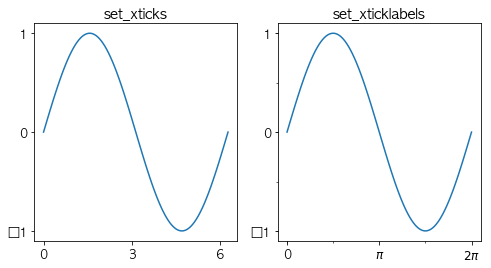

In [18]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(x, y)
ax[0].set_title('set_xticks')
ax[0].set_xticks([0, 3, 6])
ax[0].set_yticks([-1, 0, 1])

ax[1].plot(x, y)
ax[1].set_title('set_xticklabels')
ax[1].set_xticks([0, np.pi, 2*np.pi])
ax[1].set_xticklabels([0, r'$\pi$', r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([0, np.pi/2, 3*np.pi/2])
ax[1].xaxis.set_minor_locator(x_minor_ticker)
ax[1].set_yticks([-1, 0, 1])
ax[1].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(5))

#### 対数グラフ

グラフを対数表示するには、`axes.loglog()`（両対数グラフ）、`axes.semilogx()`（x軸対数グラフ）、`axes.semilogy()`（y軸対数グラフ）を使用します。

/Users/masatoshi/pyenvs/tfenv/lib/python3.6/site-packages/matplotlib/mathtext.py:843: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
  MathTextWarning)


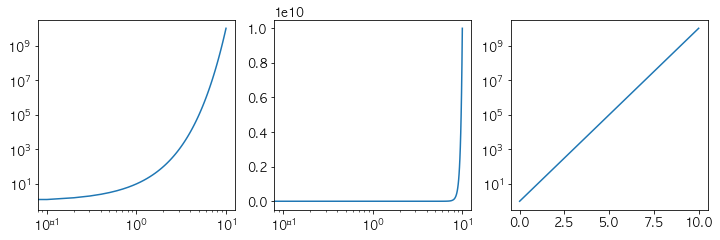

In [19]:
x = np.linspace(0, 10, 100)
y = 10**x

fig, ax = plt.subplots(1, 3, figsize=(12, 3.5))

ax[0].loglog(x, y)

ax[1].semilogx(x, y)

ax[2].semilogy(x, y)

matplotlibの詳細については、公式ドキュメント等を参照ください。

- [公式ドキュメント（英語）](https://matplotlib.org)
- [matplotlib入門-りんごがでている](http://bicycle1885.hatenablog.com/entry/2014/02/14/023734)
- [早く知っておきたかったmatplotlibの基礎知識、あるいは見た目の調整が捗るArtistの話](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

## 画像の表示

matplotlibを使うと数値行列を画像として描画することができます。  
画像を表示する`axes.implot()`メソッドは、NumPy配列あるいは後述のPILの画像を引数とすることができます。  
数値行列は浮動小数点数の場合`[0,1]`の範囲、符号なし整数の場合、`[0,255]`の範囲であることが想定されており、これを超える数値はこの範囲にクリッピングされます。

### カラーマップによる表示

2次元の行列は、数値を色に変換するカラーマップを使って表示されます。

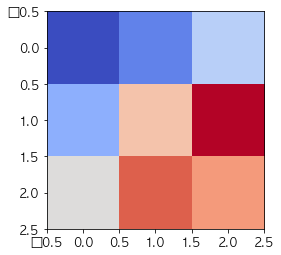

In [20]:
x = np.array([[0.0, 0.1, 0.3],
              [0.2, 0.5, 0.8],
              [0.4, 0.7, 0.6]])

plt.imshow(x, cmap='coolwarm')
plt.show()

### カラー画像の表示

`(m, n, 3)`の形状の行列はRGBのカラー画像として表示されます。  
`(m, n, 4）`の形状の行列は、透明度を表すアルファチャネルを加えたRGBAのカラー画像として表示されます。

[[[0.2465622  0.8309213  0.00194637]
  [0.95489323 0.38840154 0.7068994 ]
  [0.14881033 0.95070583 0.76308154]
  [0.05020262 0.82778209 0.27387066]]

 [[0.19147982 0.70074444 0.51857709]
  [0.50965082 0.71382916 0.81719934]
  [0.3998788  0.43812876 0.38398289]
  [0.95037949 0.44592103 0.66047864]]

 [[0.24571229 0.48625377 0.16258393]
  [0.67820106 0.03350389 0.54369565]
  [0.84939175 0.09022059 0.84870268]
  [0.57989431 0.27242972 0.71061333]]

 [[0.47900167 0.84873988 0.6747953 ]
  [0.76673207 0.08680839 0.86810037]
  [0.10688582 0.36634009 0.14676069]
  [0.47761824 0.1151851  0.21104943]]]


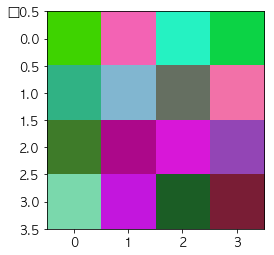

In [21]:
x = np.random.rand(4, 4, 3)
print(x)

plt.imshow(x)
plt.show()

[[[100  80 150]
  [125  41 242]
  [ 34 192  15]
  [154  23 239]]

 [[ 65 173 104]
  [ 62   6  53]
  [150 103 212]
  [ 94 188 181]]

 [[111  20 107]
  [  1 231 229]
  [237  87   2]
  [ 81 253 231]]

 [[247  26  91]
  [157 237 204]
  [127 145 250]
  [170 254 145]]]


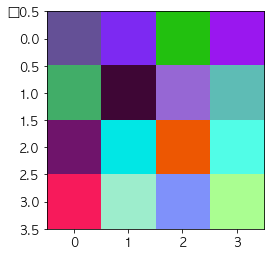

In [22]:
x = np.random.randint(0, 255, (4, 4, 3), dtype=np.uint8)
print(x)

plt.imshow(x)
plt.show()

### PIL（Pillow）ライブラリを使う

PILはPythonで様々な画像処理を行うことができるライブラリです。  

https://pypi.org/project/Pillow/

現在はPIL互換のPillowライブラリが主として使用されます。  
（なお、高度な画像処理を行うにはC/C++で記述されたOpenCVライブラリを使用します）

In [23]:
!pip install pillow

### 画像ファイルの読み込みとNumPy配列への変換

PIL(Pillow)の中心はImageクラスで、このクラスを使って画像ファイルを読み込むことができます。  
ファイルの形式は拡張子で自動的に判定され、JPEGなどデコードも自動的に行われます。  

Imageクラスのオブジェクトはそのままでも`pyplot.imshow()`メソッドで表示ができますが、`numpy.array()`メソッドでNumPy配列に変換することができます。

まず、著作権フリーの画像をダウンロードします。

In [17]:
import requests

url = 'https://images.pexels.com/photos/617278/pexels-photo-617278.jpeg'  
r = requests.get(url)

with open('pexels-photo-617278.jpeg', 'wb') as f:  
    f.write(r.content)


PILを使って画像を読み込み、表示します。

(3264, 4928, 3)


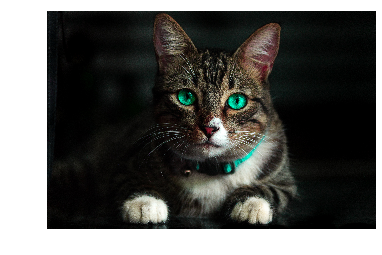

In [18]:
from PIL import Image

img = Image.open('pexels-photo-617278.jpeg')
img_array = np.array(img)
print(img_array.shape)

plt.imshow(img_array)
plt.axis('off')  # 座標軸を隠す
plt.show()

### 画像のサイズ変更

機械学習などでは画像を同じサイズに揃えることが必要です。`Image.resize()`メソッドを使うことで簡単にサイズ変更が可能です。

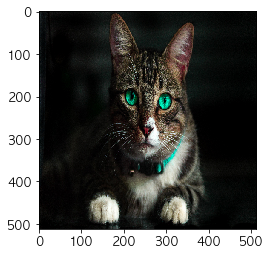

In [19]:
square_img = img.resize((512,512))

plt.imshow(square_img)
plt.show()

Pillowを使った画像処理については公式ドキュメントやブログ記事を参照ください。

- [公式ドキュメント（英語）](https://pillow.readthedocs.io/en/stable/)
- [Pythonの画像処理ライブラリPillow(PIL)の使い方-note.nkmk.me](https://note.nkmk.me/python-pillow-basic/)

## 参考書籍

Pythonを科学技術計算に利用するのであれば、下記の電子書籍がおすすめです。固定レイアウトとリフロー版があります。いずれも1,200円ですがKindle Unlimitedの対象であるためKindle Unlimitedの契約者は無料で購読できます。

- [Pythonによる科学技術計算 基礎編 [プリント・レプリカ] Kindle版](https://www.amazon.co.jp/dp/B01EPEVLG8/)
- [Pythonによる科学技術計算 基礎編 [リフロー版] Kindle版](https://www.amazon.co.jp/dp/B06VWHC5RJ/)

![Pythonによる科学技術計算 基礎編 ](https://images-fe.ssl-images-amazon.com/images/I/41BIBoq0caL.jpg)